In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import ipywidgets as widgets
from time import sleep
from tensorflow.keras import layers
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


In [3]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:
    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [4]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
import platform
import torch
use_cuda = torch.cuda.is_available()
platform.processor()
device = torch.device("cuda:2" if use_cuda else "cpu")

Num GPUs Available:  1


In [5]:
batch_size = 32
img_height = 224
img_width = 224

In [6]:
import pathlib
data_dir = r"C:\Users\thanaphat turienngam\Desktop\Cassava\classification\dataset_aug\trainwithaugment"
test_dir = r"C:\Users\thanaphat turienngam\Desktop\Cassava\classification\dataset_fill\test"
data_dir = pathlib.Path(data_dir)

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,label_mode='categorical'
)

Found 4200 files belonging to 4 classes.
Using 3360 files for training.


In [8]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,label_mode='categorical'
)

Found 976 files belonging to 4 classes.


In [9]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,label_mode='categorical'
)

Found 4200 files belonging to 4 classes.
Using 840 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['cbb', 'cbsd', 'cmd', 'healthy']


In [11]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#     for i in range(20):
#         ax = plt.subplot(5, 5, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title(class_names[labels[i]])
#         plt.axis("off")

In [12]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32, 4)


In [13]:
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.models import Model

baseModel= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(img_height,img_width,3),pooling='avg',
                   weights='imagenet',classes=4)
for layer in baseModel.layers:
        layer.trainable=False
outModel = baseModel.output
outModel = Flatten()(outModel)
outModel = Dense(1024,activation = 'relu')(outModel)
outModel = Dense(512,activation = 'relu')(outModel)
outModel = Dense(4,activation = 'softmax')(outModel)

resnet_model = Model(inputs=baseModel.input, outputs=outModel)

In [14]:
resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [15]:
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [16]:
from tensorflow import keras
from tensorflow.keras import layers
# opt = keras.optimizers.Adam(learning_rate=0.00001)
# resnet_model.compile(
#     loss='sparse_categorical_crossentropy',
# #     optimizer=opt,
#     metrics=['accuracy']
#     )
resnet_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
early_stop = tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
check_point = tf.keras.callbacks.ModelCheckpoint('.\\project\\'+'\\weight\\'+'ResNet50T1'+'.h5')

In [17]:
epochs=100

history = resnet_model.fit(
    train_ds, 
    validation_data=val_ds,
    epochs=epochs,
     callbacks=[early_stop,check_point]
)

Epoch 1/100
105/105 [==============================] - 46s 311ms/step - loss: 0.6979 - accuracy: 0.7521 - val_loss: 0.5081 - val_accuracy: 0.8202
Epoch 2/100
105/105 [==============================] - 30s 283ms/step - loss: 0.4092 - accuracy: 0.8506 - val_loss: 0.4533 - val_accuracy: 0.8512
Epoch 3/100
105/105 [==============================] - 45s 428ms/step - loss: 0.3333 - accuracy: 0.8771 - val_loss: 0.4817 - val_accuracy: 0.8286
Epoch 4/100
105/105 [==============================] - 36s 343ms/step - loss: 0.2555 - accuracy: 0.9068 - val_loss: 0.4615 - val_accuracy: 0.8476
Epoch 5/100
105/105 [==============================] - 34s 325ms/step - loss: 0.2171 - accuracy: 0.9217 - val_loss: 0.4792 - val_accuracy: 0.8536
Epoch 6/100
105/105 [==============================] - 35s 332ms/step - loss: 0.1705 - accuracy: 0.9438 - val_loss: 0.4436 - val_accuracy: 0.8536
Epoch 7/100
105/105 [==============================] - 42s 396ms/step - loss: 0.1184 - accuracy: 0.9634 - val_loss: 0.4520 -

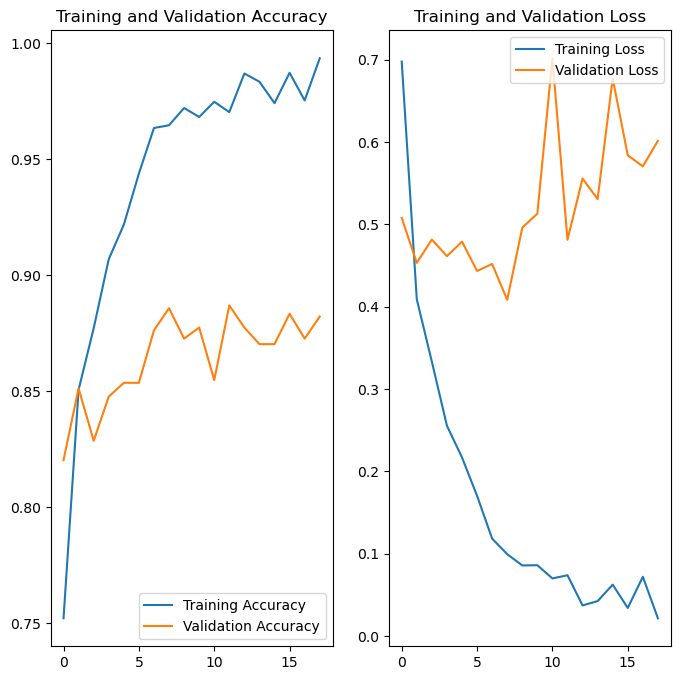

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(18)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
print("Evaluate on test data")
results = resnet_model.evaluate(test_ds, batch_size=32)
print("test loss, test acc:", results)

Evaluate on test data
31/31 [==============================] - 7s 213ms/step - loss: 0.9986 - accuracy: 0.7684
test loss, test acc: [0.9985780715942383, 0.7684426307678223]


In [ ]:
img_path = r"C:\Users\thanaphat turienngam\Desktop\Cassava\classification\dataset\test\cbb\test-img-15.jpg"
img = tf.keras.utils.load_img(
    img_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = resnet_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [ ]:
resnet_model.save('.\\project\\'+'\\weight\\'+'ResNet50T1'+'.h5')

In [ ]:
test_data = test_ds.map(lambda x, y: (x , 
                                      tf.one_hot(y, depth=5)))
